In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [178]:
df = pd.read_csv('athlete_events.csv', delimiter=',') 

In [179]:
df = df.loc[(df['Sport'] == "Basketball")]

In [180]:
female_players = df.loc[(df['Sex'] == "F")]
male_players = df.loc[(df['Sex'] == "M")]

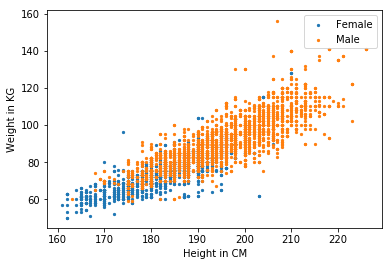

In [181]:
# The goal is to build log regression classification algorithm to predict
# basketball player gender from his/her weight and height.
plt.scatter(female_players['Height'], female_players['Weight'], s=5, label='Female')
plt.scatter(male_players['Height'], male_players['Weight'], s=5, label='Male')
plt.legend()
plt.ylabel("Weight in KG")
plt.xlabel("Height in CM")
plt.show()

In [182]:
def sigmoid(X, weight):
    # logistic function 1 / (1 + e^(-z)) | e - Euler’s number. It is approximately 2.718281
    return 1 / (1 + np.exp(-np.dot(X, weight)))

In [183]:
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

In [184]:
bin_sex = []
# convert male to 0 and female to 1
for item in df['Sex']:
    if item == 'M':
        bin_sex.append(0)
    else:
        bin_sex.append(1)

In [185]:
# target row with binary encoded sex
df["class"] = bin_sex
# droping NaN rows
df = df.drop("Medal", axis=1)
df = df.dropna()

# X will be used for log regression algorithm build from scratch
X = df[['Height','Weight']].copy()
# X2 will be used for built-in log regression algorithm
X2 = df[['Height','Weight']].copy()
# copy target column
y = df['class'].copy()

In [186]:
total_iter = 50000
learning_rate = 0.1

In [187]:
# fill array of len(x) with 1
intercept = np.ones((X.shape[0], 1)) 

In [188]:
# merge two arrays
X = np.concatenate((intercept, X), axis=1)

In [189]:
theta = np.zeros(X.shape[1])

for i in range(total_iter):
    h = sigmoid(X, theta)
    gradient = gradient_descent(X, h, y)
    theta = update_weight_loss(theta, learning_rate, gradient)

/Users/rokas/.virtualenvs/ssa/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [190]:
weights = sigmoid(X, theta)

/Users/rokas/.virtualenvs/ssa/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [191]:
df_predict = pd.DataFrame(np.around(weights, decimals=6)).join(y)
df_predict['predicted_sex'] = df_predict[0].apply(lambda x : 0 if x < 0.5 else 1)
print('Accuracy:')
df_predict.loc[df_predict['predicted_sex']==df_predict['class']].shape[0] / df_predict.shape[0] * 100


Accuracy:


0.8996728462377318

In [192]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=total_iter)
clf.fit(df[['Height','Weight']], y)

/Users/rokas/.virtualenvs/ssa/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [193]:
sklearn_weights = clf.predict(df[['Height','Weight']])

In [194]:
df_sklearn = pd.DataFrame(sklearn_weights).join(y)
print("Accuracy:")
df_sklearn.loc[df_sklearn[0]==df_sklearn['class']].shape[0] / df_sklearn.shape[0] * 100


Accuracy:


0.8178844056706652

In [195]:
# Accuracy improvement could be done by adding more features such as years and country. 
# Difference between sklearn log regression algorithm and the one builded from scratch 
# could be cause by regularization which is taken into account in sklearn case. 
# Regularization is used to prevent the model from overfitting the data.